<a href="https://colab.research.google.com/github/pripalazzo/Iniciacao_Machine_Learning/blob/main/Trabalho_Pr%C3%A1tico_IGTI_(SVM)_M%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando o pandas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importando o dataset que será analisado
df = pd.read_csv('bloodtransf.csv')

In [ ]:
df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [ ]:
# Quantas instâncias e atributos existem, respectivamente?
df.shape

(748, 5)

In [ ]:
# Quantos tipos diferentes de dados existem no dataset?
# Qual é a proporção (em %) de valores nulos existente ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
# Medidas descritivas
df.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [ ]:
#selecionando as variáveis para os modelos de regressão 
X=df[['V1','V2', 'V3', 'V4']] #variáveis independentes
y=df['Class'] #variáveis dependentes

In [ ]:
X.shape

(748, 4)

In [ ]:
y.shape

(748,)

In [ ]:
# função que realiza a divisão do dataset
from sklearn.model_selection import train_test_split  

# divide 37% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)

In [ ]:
from sklearn.svm import SVC

In [ ]:
#cria o objeto SVM
clf_svm = SVC(kernel = 'rbf')

#realiza a classificação via SVM
clf_svm.fit(X_train,y_train)

SVC()

In [ ]:
#Realiza a previsão de classificaçao 
y_pred = clf_svm.predict(X_test)

In [ ]:
#realiza o plot da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

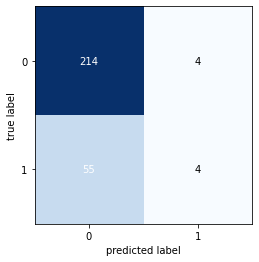

              precision    recall  f1-score   support

           1       0.80      0.98      0.88       218
           2       0.50      0.07      0.12        59

    accuracy                           0.79       277
   macro avg       0.65      0.52      0.50       277
weighted avg       0.73      0.79      0.72       277



In [ ]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
# Precision
from sklearn.metrics import precision_score #precision
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.795539


In [ ]:
# Recall
from sklearn.metrics import recall_score #recall
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.981651


In [ ]:
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUROC', metrics.roc_auc_score(y_test, y_pred))
print('F1', metrics.f1_score(y_test, y_pred))

Precision: 0.7955390334572491
Recall: 0.981651376146789
AUROC 0.5247239931581403
F1 0.8788501026694046
